In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

In [12]:
betanyc = pd.read_csv("/Users/xiaolongl/Downloads/311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

In [13]:
betanyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,47203872,08/12/2020 12:00:12 AM,08/12/2020 12:01:36 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040.0,61 ELLWOOD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.860530,-73.928597,"(40.86053025821177, -73.92859702407956)"
1,47211278,08/12/2020 12:00:22 AM,08/12/2020 12:28:57 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11214.0,140 BAY 37 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.596065,-73.991516,"(40.59606483814468, -73.99151642488441)"
2,47207819,08/12/2020 12:01:01 AM,08/12/2020 12:57:27 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10472.0,1953 GLEASON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830854,-73.859083,"(40.830853624226265, -73.85908253864359)"
3,47209172,08/12/2020 12:01:06 AM,08/12/2020 12:18:11 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NaN,10027.0,3150 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814239,-73.959336,"(40.81423917924942, -73.95933609407547)"
4,47203633,08/12/2020 12:01:07 AM,08/12/2020 12:38:58 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11234.0,1234 EAST 49 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631204,-73.929210,"(40.63120416490664, -73.92920986625185)"


In [14]:
betanyc.shape

(50762, 41)

In [15]:
betanyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

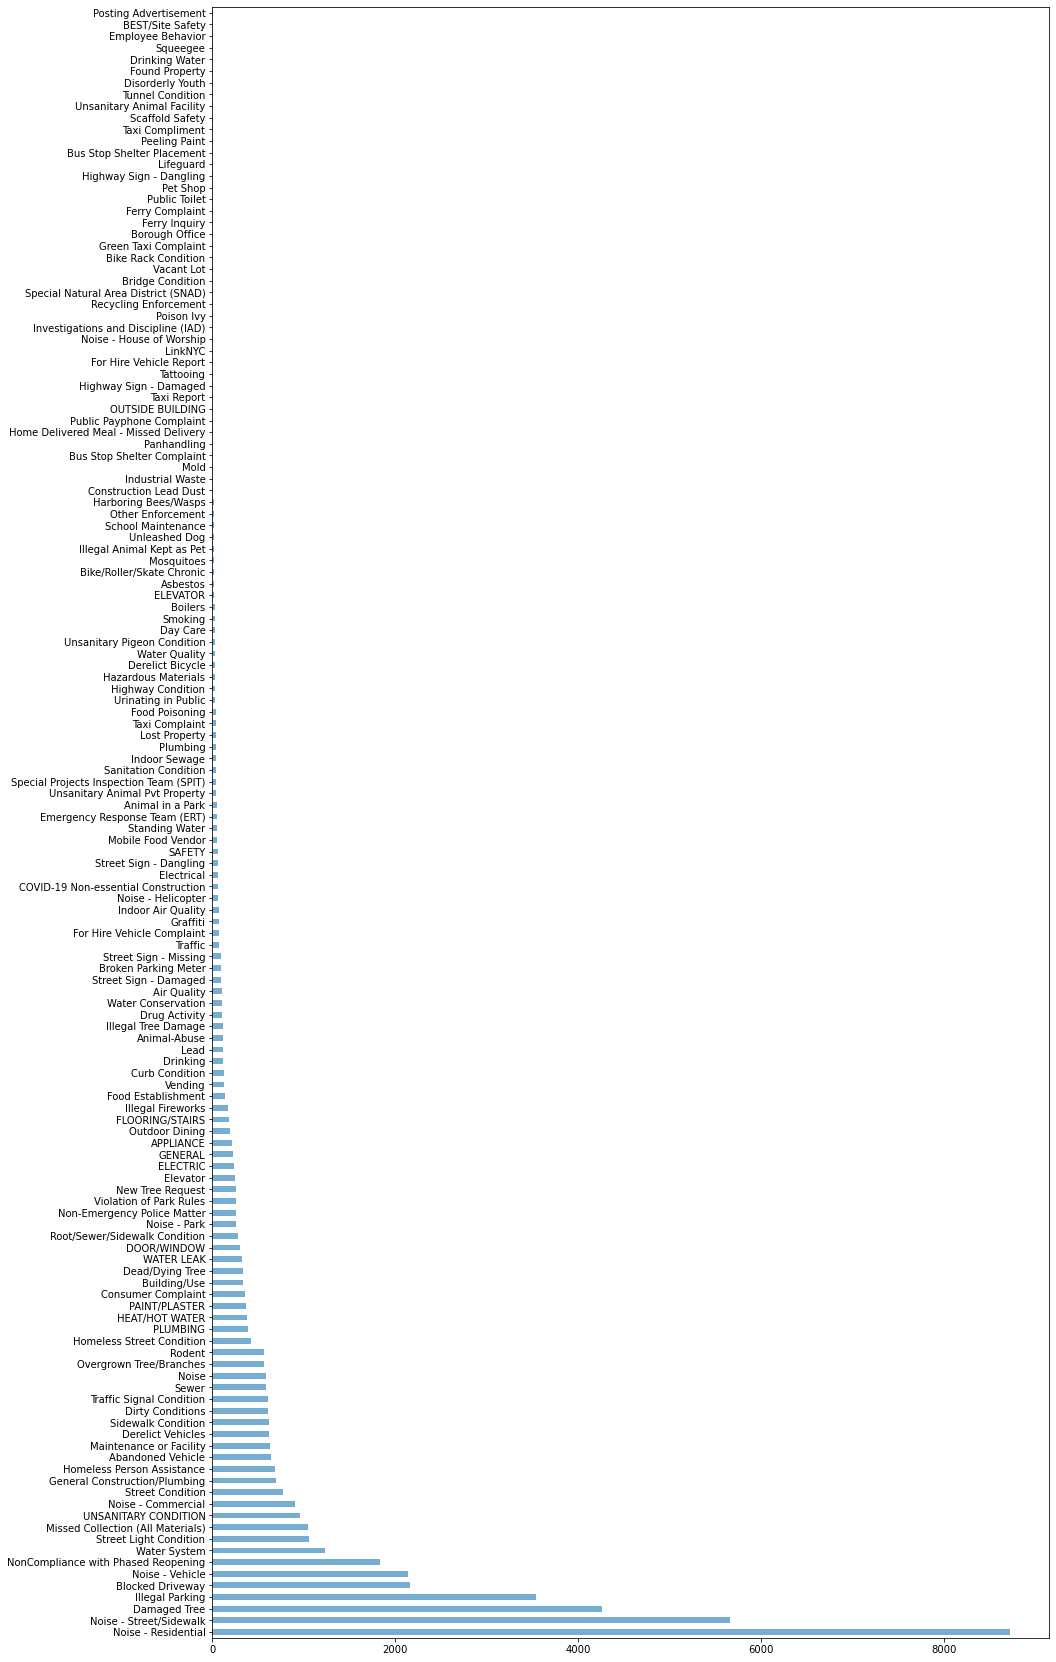

In [16]:
betanyc['Complaint Type'].value_counts().plot(kind = 'barh', alpha = 0.6, figsize = (15, 30))

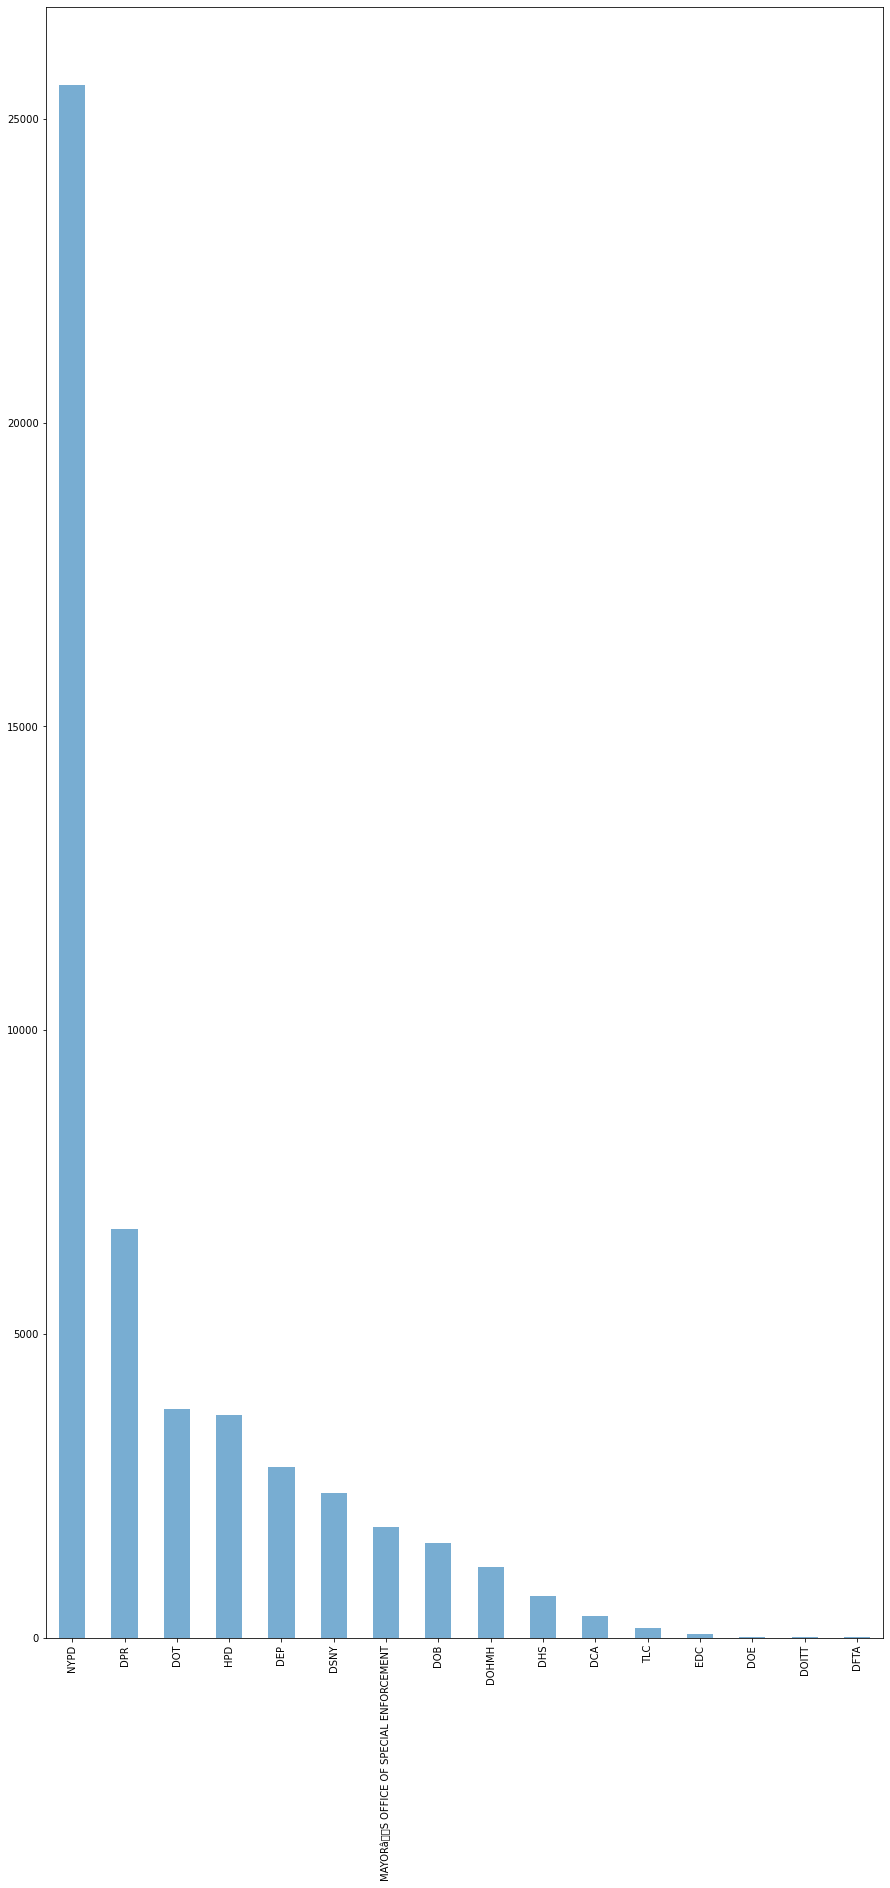

In [23]:
betanyc['Agency'].value_counts().plot(kind = 'bar', alpha = 0.6, figsize = (15, 30))

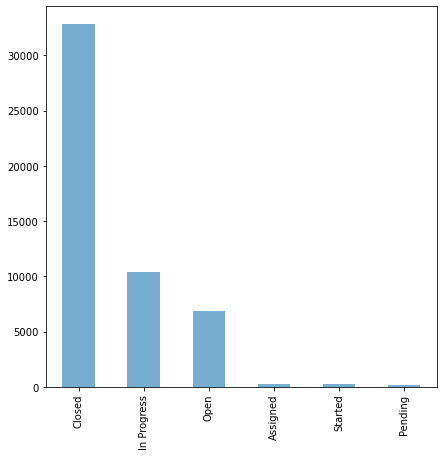

In [25]:
betanyc['Status'].value_counts().plot(kind = 'bar', alpha = 0.6, figsize = (7, 7))

In [26]:
groupbyComplaintType = betanyc.groupby('Complaint Type')

In [34]:
betanyc['City'].shape

(46858,)

In [36]:
damagedTreeData = groupbyComplaintType.get_group('Damaged Tree')
damagedTreeData.shape

(4262, 41)

In [30]:
groupbyComplaintType

In [29]:
betanyc.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                       16640
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         1345
Location Type                      9117
Incident Zip                       1268
Incident Address                   2257
Street Name                        2259
Cross Street 1                     7572
Cross Street 2                     7598
Intersection Street 1             10981
Intersection Street 2             10988
Address Type                      37369
City                               3904
Landmark                          15441
Facility Type                     49338
Status                                0
Due Date                          50757
Resolution Description            13101
Resolution Action Updated Date    14147
Community Board                       0
BBL                                6837


In [32]:
betanyc['City'].dropna(inplace=True)

In [33]:
betanyc['City'].shape

(46858,)

In [37]:
damagedTreeData['City'].isnull().sum()

349

In [40]:
damagedTreeData['City'].fillna('Unknown City', inplace = True)

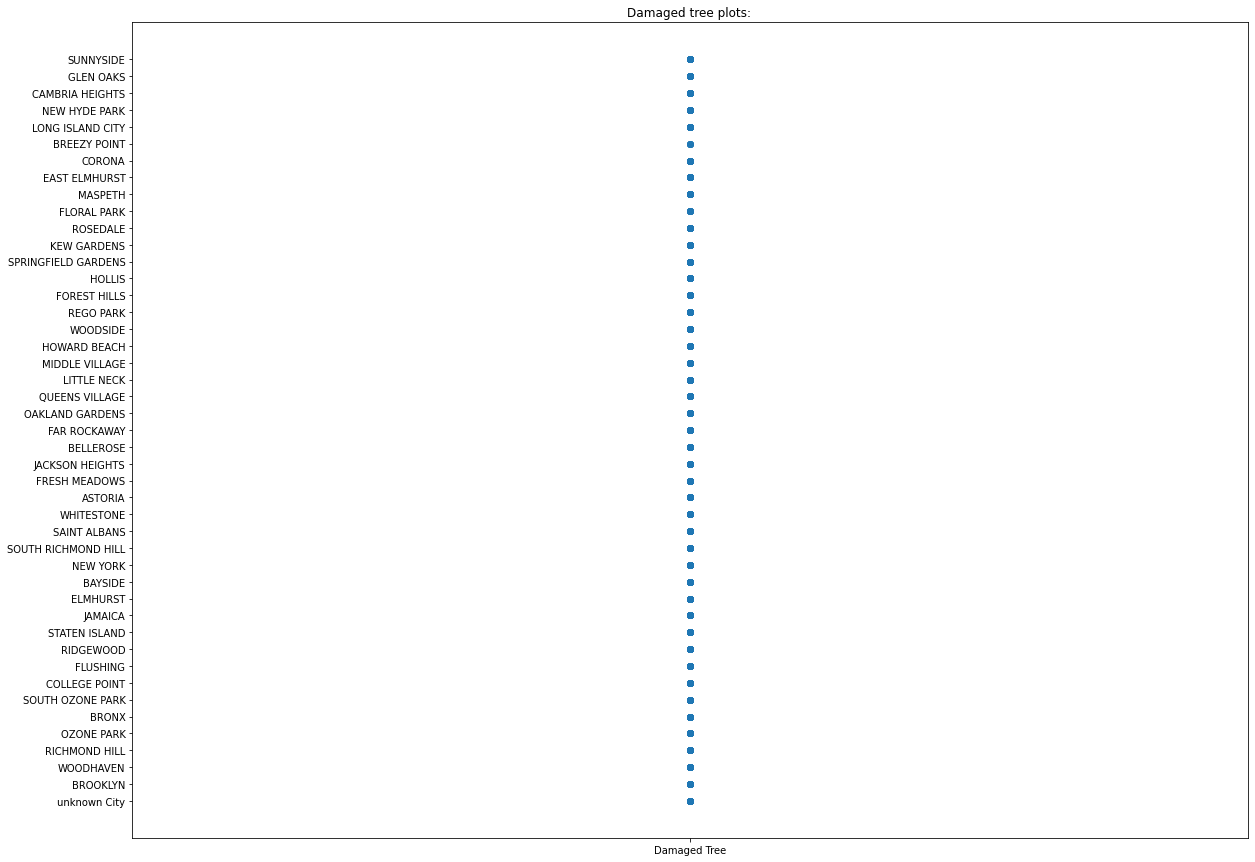

In [43]:
plt.figure(figsize = (20, 15))
plt.scatter(damagedTreeData['Complaint Type'], damagedTreeData['City'])
plt.title('Damaged tree plots: ')
plt.show()

In [45]:
top10 = groupbyComplaintType['Complaint Type'].value_counts().nlargest(10)

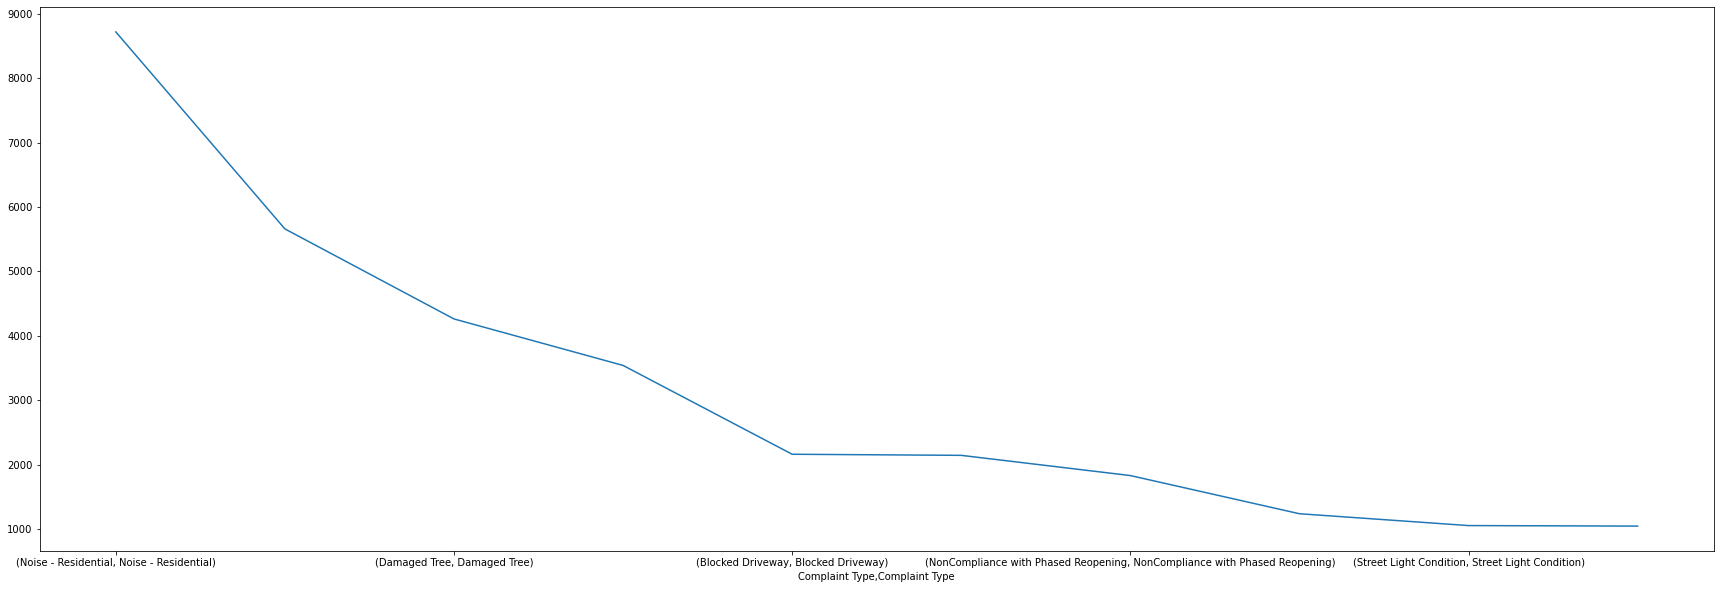

In [81]:
top10.plot(x = 'Complaint Type',figsize=(30,10))